<a href="https://colab.research.google.com/github/01star01ek/01star01ek/blob/main/%EA%B9%94%EB%81%94%EA%B2%B0%EA%B3%BC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os, shutil

# 설치
if os.path.exists('/content/SimSwap'):
    shutil.rmtree('/content/SimSwap')

%cd /content
!git clone -q https://github.com/woctezuma/SimSwap.git SimSwap
%cd SimSwap
!git checkout -q upgrade-insightface

# 패키지 설치
!pip install --force-reinstall "numpy<2.0"

/content
/content/SimSwap
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 578.4 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 67.9 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.


In [2]:
!pip install -q torch==2.0.1 torchvision==0.15.2 --index-url https://download.pytorch.org/whl/cu118
!pip install -q insightface==0.7.3 onnxruntime moviepy opencv-python imageio==2.34.0

# 필수 모델만 다운로드
!mkdir -p parsing_model/checkpoint checkpoints insightface_func/models
!wget -q https://github.com/neuralchen/SimSwap/releases/download/1.0/checkpoints.zip -O checkpoints.zip
!wget -q https://github.com/neuralchen/SimSwap/releases/download/1.0/79999_iter.pth -O parsing_model/checkpoint/79999_iter.pth
!wget -q https://github.com/woctezuma/SimSwap-colab/releases/download/antelope/antelope.zip -O antelope.zip
!wget -q https://github.com/neuralchen/SimSwap/releases/download/512_beta/512.zip -O 512.zip
!unzip -q checkpoints.zip -d checkpoints && unzip -q 512.zip -d checkpoints && unzip -q antelope.zip -d insightface_func/models/


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 GB 244.0 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.1/6.1 MB 62.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.3/63.3 MB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.3/132.3 kB 10.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchaudio 2.6.0+cu124 requires torch==2.6.0, but you have torch 2.0.1+cu118 which is incompatible.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 439.5/439.5 kB 9.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 313.4/313.4 kB 21.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 110.5 MB/

In [14]:

# 호환성 수정
!cp models/fs_model.py models/fs_model.py.backup
!sed -i 's/torch.load(netArc_checkpoint, map_location=torch.device("cpu"))/torch.load(netArc_checkpoint, map_location=torch.device("cpu"), weights_only=False)/g' models/fs_model.py
!sed -i 's/det_size=(640,640)/det_size=(320,320)/g' test_wholeimage_swapsingle.py

%cd /content/SimSwap/
with open('test_wholeimage_swapsingle.py', 'r') as f:
    content = f.read()

lines = content.split('\n')
new_lines = []
for line in lines:
    new_lines.append(line)
    if 'app.prepare(' in line:
        new_lines.extend([
            '    if hasattr(app.models, "detection"):',
            '        app.models["detection"].nms_thresh = 0.3',
            '        app.models["detection"].det_thresh = 0.3'
        ])

with open('test_wholeimage_swapsingle.py', 'w') as f:
    f.write('\n'.join(new_lines))


/content/SimSwap


In [8]:
# arcface 모델 다운로드
!mkdir -p arcface_model
!wget -q https://github.com/woctezuma/SimSwap-colab/releases/download/1.0/arcface_checkpoint.tar -O arcface_model/arcface_checkpoint.tar

# 다운로드 확인
!ls -la arcface_model/
!file arcface_model/arcface_checkpoint.tar

# 파일 크기 확인 (정상이면 몇십MB 이상)
!du -h arcface_model/arcface_checkpoint.tar


total 204384
drwxr-xr-x  2 root root      4096 Jun 19 04:40 .
drwxr-xr-x 17 root root      4096 Jun 19 04:40 ..
-rw-r--r--  1 root root 209280521 Apr 26  2023 arcface_checkpoint.tar
arcface_model/arcface_checkpoint.tar: Zip archive data, at least v0.0 to extract, compression method=store
200M	arcface_model/arcface_checkpoint.tar


소스 이미지 업로드:


Saving source.png to source (2).png
타겟 이미지 업로드:


Saving target.png to target (2).png
------------ Options -------------
Arc_path: arcface_model/arcface_checkpoint.tar
aspect_ratio: 1.0
batchSize: 8
checkpoints_dir: ./checkpoints
cluster_path: features_clustered_010.npy
crop_size: 224
data_type: 32
dataroot: ./datasets/cityscapes/
display_winsize: 512
engine: None
export_onnx: None
feat_num: 3
fineSize: 512
fp16: False
gpu_ids: [0]
how_many: 50
id_thres: 0.03
image_size: 224
input_nc: 3
instance_feat: False
isTrain: False
label_feat: False
label_nc: 0
latent_size: 512
loadSize: 1024
load_features: False
local_rank: 0
max_dataset_size: inf
multisepcific_dir: ./demo_file/multispecific
nThreads: 2
n_blocks_global: 6
n_blocks_local: 3
n_clusters: 10
n_downsample_E: 4
n_downsample_global: 3
n_local_enhancers: 1
name: people
nef: 16
netG: global
ngf: 64
niter_fix_global: 0
no_flip: False
no_instance: False
no_simswaplogo: True
norm: batch
norm_G: spectralspadesyncbatch3x3
ntest: inf
onnx: None
output_nc: 3
output_path: ./output/
phase: test

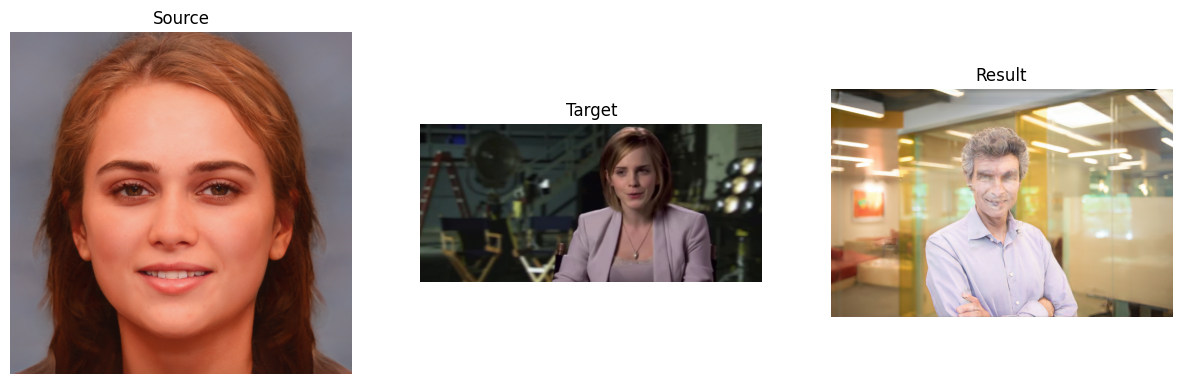

✅ 완료! 파일: result.jpg


In [10]:

# 이미지 업로드
from google.colab import files
import cv2, matplotlib.pyplot as plt

print("소스 이미지 업로드:")
source_uploaded = files.upload()
shutil.copy(list(source_uploaded.keys())[0], 'source.jpg')

print("타겟 이미지 업로드:")
target_uploaded = files.upload()
shutil.copy(list(target_uploaded.keys())[0], 'target.jpg')

# Face Swap 실행
!python test_wholeimage_swapsingle.py \
    --crop_size 224 \
    --use_mask \
    --no_simswaplogo \
    --name people \
    --Arc_path arcface_model/arcface_checkpoint.tar \
    --pic_a_path source.jpg \
    --pic_b_path target.jpg \
    --pic_specific_path target.jpg \
    --output_path ./output/

# 결과 확인
output_files = [f for f in os.listdir('./output/') if f.endswith(('.jpg', '.png'))]

if output_files:
    plt.figure(figsize=(15, 5))

    images = [
        (cv2.imread('source.jpg'), 'Source'),
        (cv2.imread('target.jpg'), 'Target'),
        (cv2.imread(f'./output/{output_files[0]}'), 'Result')
    ]

    for i, (img, title) in enumerate(images):
        plt.subplot(1, 3, i+1)
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.title(title)
        plt.axis('off')

    plt.show()
    print(f"✅ 완료! 파일: {output_files[0]}")
else:
    print("❌ 실패")